## <b> Chatbot </b>

In [1]:
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.insert(0, '')
import nlp_utils as nu

In [3]:
f = open('dialogs.txt', 'r')
print(f.read())

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [4]:
df = pd.read_csv('dialogs.txt', sep='\t', names = ['Query', 'Response'])

In [5]:
df

,Query,Response
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


### Understanding the Data

In [6]:
df.describe(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


(                    Query           Response
 count                3725               3725
 unique               3510               3512
 top     what do you mean?  what do you mean?
 freq                   22                 22,
 None)

In [7]:
df[df['Query'] == 'what do you mean?']

,Query,Response
914,what do you mean?,i mean you're wasting your life.
1032,what do you mean?,i buried him with his cell phone.
1193,what do you mean?,what's your mailing address?
1338,what do you mean?,every morning you get up late and rush off to ...
1422,what do you mean?,"when you die and go to heaven, they will offer..."
1491,what do you mean?,"if you're going to make a wish, wish that you ..."
1604,what do you mean?,you would float into the sky like a balloon.
1698,what do you mean?,"i mean, keep your belongings close to you."
1797,what do you mean?,that's six times a year!
1838,what do you mean?,the car isn't here.


In [8]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [9]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

### Data Visualisation

In [10]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [11]:
query = df['Query']

In [12]:
sid = SentimentIntensityAnalyzer()
i = 0
for sentence in query:
    i+=1
    print(sentence)

    ss = sid.polarity_scores(sentence)
    for k in ss:
        print(f'{k}: {ss[k]}', end = ' ')
    print()

    if i == 7:
        break

hi, how are you doing?
neg: 0.0 neu: 1.0 pos: 0.0 compound: 0.0 
i'm fine. how about yourself?
neg: 0.0 neu: 0.69 pos: 0.31 compound: 0.2023 
i'm pretty good. thanks for asking.
neg: 0.0 neu: 0.25 pos: 0.75 compound: 0.8402 
no problem. so how have you been?
neg: 0.495 neu: 0.505 pos: 0.0 compound: -0.5994 
i've been great. what about you?
neg: 0.0 neu: 0.549 pos: 0.451 compound: 0.6249 
i've been good. i'm in school right now.
neg: 0.0 neu: 0.707 pos: 0.293 compound: 0.4404 
what school do you go to?
neg: 0.0 neu: 1.0 pos: 0.0 compound: 0.0 


In [13]:
df['rating'] = query.apply(sid.polarity_scores)
df = pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [14]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

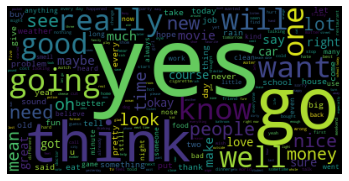

In [15]:
wordcloud = WordCloud(background_color = 'black', max_words = 1000).generate(" ". join(query))

plt.imshow(wordcloud)
plt.axis('off')

### Text Normalization

In [16]:
import re

In [17]:
# Remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# Convert strings to lowercase, and removes punctuation
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n'
remove_n = lambda x: re.sub('\n', ' ', x)

# Remove all non-ascii characters
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]', r' ', x)

# Apply the lambda functions
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

### Text Vectorization

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer()
factors = tfidf.fit_transform(df['Query']).toarray()
factors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35055373, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Demo

In [20]:
from sklearn.metrics.pairwise import cosine_distances
query_vector = tfidf.transform(['Whats up']).toarray()
similar_score = 1 - cosine_distances(factors, query_vector)
print(df['Query'][similar_score.argmax()])
print(similar_score[similar_score.argmax()][0])

what s up 
0.8436000974549689


In [21]:
tfidf.get_feature_names()

c:\Users\Okwy Uwadoka\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
 'again',
 'against',
 'age',
 'ago',
 'agree',
 'ahead',
 'aid',
 'aids',
 'air',
 'airport',
 'aisle',
 'alarm',
 'alice',
 'alive',
 'all',
 'allergic',
 'alley',
 'allow',
 'allowed',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'altitude',
 'always',
 'am',
 'amateur',
 'amazing',
 'american',
 'an',
 'and',
 'andy',
 'angeles',
 'angry',
 'animal',
 'animals',
 'anita',
 'anniversary',
 'another',
 'answer',
 'answered',
 'antenna',
 'any',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apartment',
 'apologize',
 'apologized',
 'apples',
 'appointment',
 'appreciate',
 'april',
 'are',
 'aren',
 'argument',
 'arizona',
 'arm',
 'arms',
 'army',
 'around',
 'arrow',
 'art',
 'a

### Application

In [22]:
query = 'who are you?'
def chatbot(query):
    # 1. Clean
    query = nu.lemmatization_sentence(query)

    # 2. Word Embedding
    query_vector = tfidf.transform([query]).toarray()

    # 3. Cosine similarity
    similar_score = 1 - cosine_distances(factors, query_vector)
    index = similar_score.argmax()

    # 4. Searching and matching the question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match': matching_question,
                'response': response,
                'confidence': confidence,
                'pos': pos_score,
                'neg': neg_score,
                'neu': neu_score}
    return chat_dict

In [30]:
while True:
    query = input('USER: ')
    print(f'USER: {query}')
    if query == 'exit':
        break

    response = chatbot(query)
    if response['confidence'] <=0.2:
        print('BOT: Please rephrase your question')
    else:
        print('='*80)
        print(f'Matched Question: {response["match"]}')
        print(f'Confidence: {response["confidence"]}, Positive score: {response["pos"]}, Negative score: {response["neg"]}, Neutral score: {response["neu"]}')
        print(f'BOT: {response["response"]}\n')

USER: good morning
Matched Question: i had a busy morning 
Confidence: 0.5543260300793577, Positive score: 0.0, Negative score: 0.0, Neutral score: 1.0
BOT: what did you do 

USER: exit
